In [1]:
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, MiniBatchNMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

In [2]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [4]:
# Load data
data, _ = fetch_20newsgroups(
    shuffle=True,
    random_state=1,
    remove=("headers", "footers", "quotes"),
    return_X_y=True,
)
data_samples = data[:2000]

In [7]:
# Define and fit vectorizers

tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=1000, stop_words="english"
)

tfidf = tfidf_vectorizer.fit_transform(data_samples)




tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=1000, stop_words="english"
)

tf = tf_vectorizer.fit_transform(data_samples)

In [9]:
nmf = NMF(
    n_components=10,
    random_state=1,
    init='nndsvda',
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)

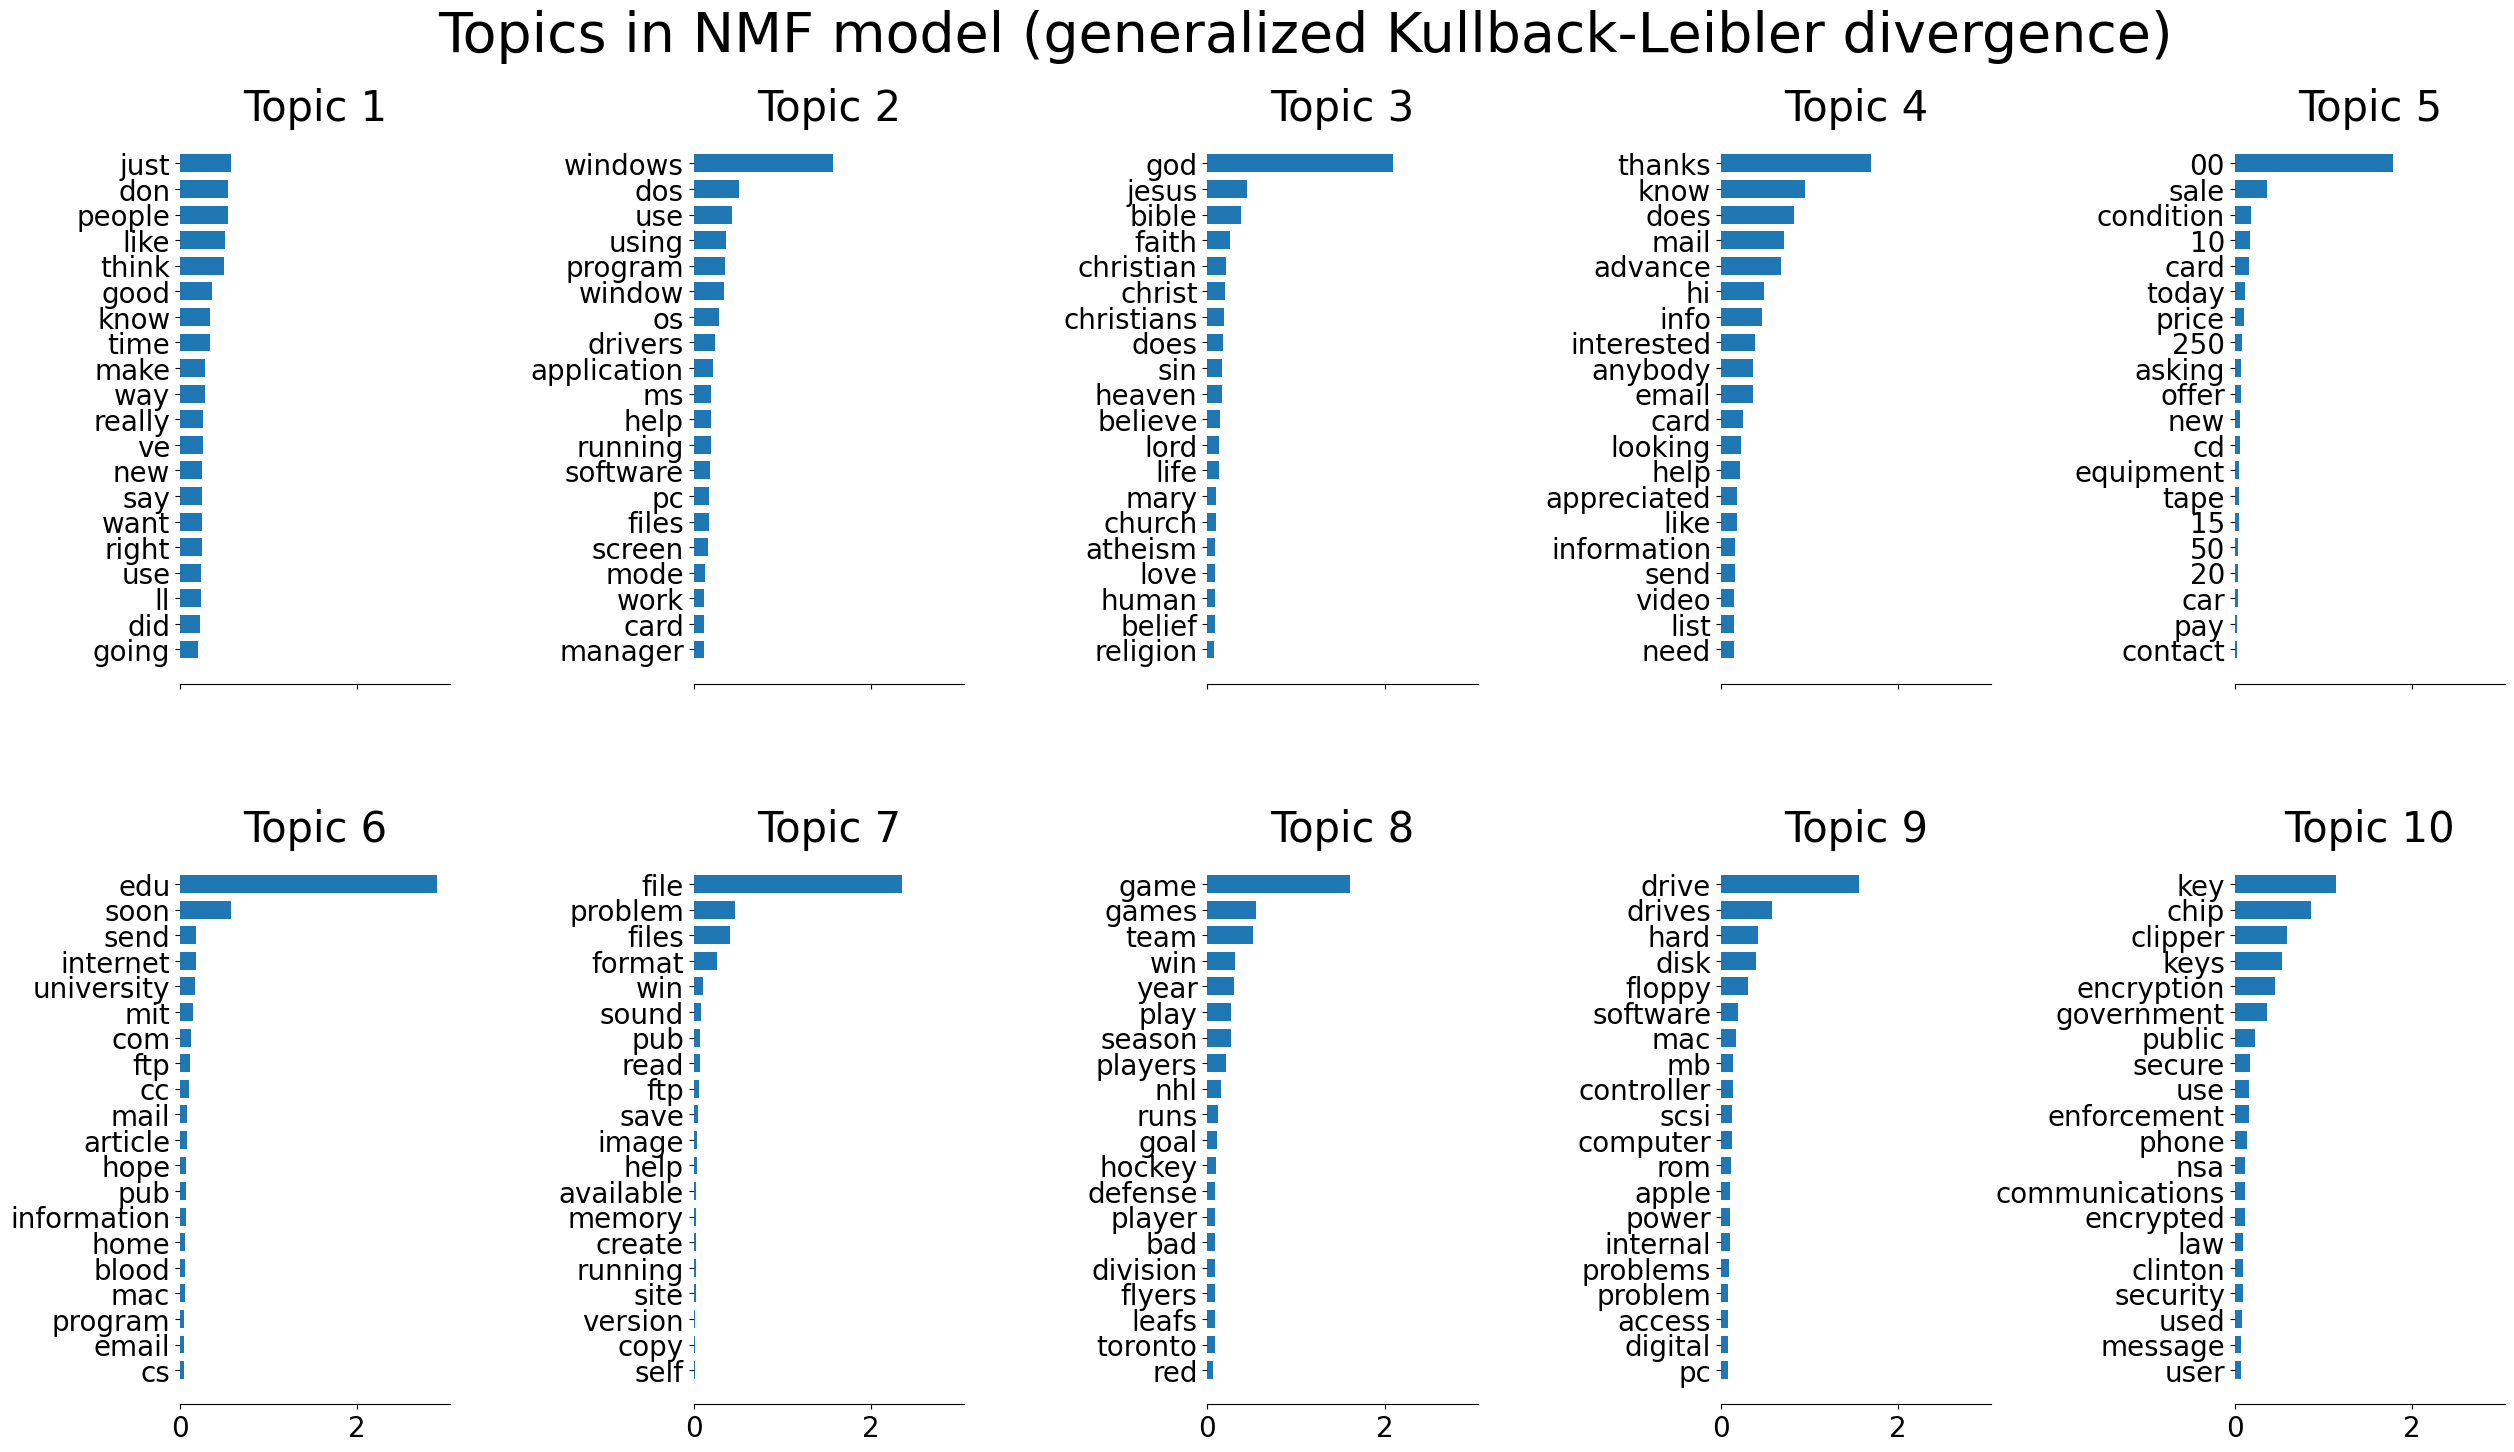

In [11]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    20,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)

### Things to try with NMF

* Try different init parameter for the sklearn NMF (such as 'nndsvda')
* Try different beta_loss parameters (such as 'frobenius' or 'kullback-leibler')
* Try different alpha_W and alpha_H values
* Try different l1_ratio values

In [12]:
from gensim.models.doc2vec import Doc2Vec 

In [14]:
d2v = Doc2Vec(alpha = 0.025, min_alpha=0.00025)

In [15]:
d2v('My sentence')

TypeError: 'Doc2Vec' object is not callable